$$Diego \space Castillo \space Reyes$$

<h1 align="center">Contador QFT</h1>

In [224]:
from qiskit import *
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import numpy as np

In [225]:
# ask for a numer to count
n = int(input("Ingresa el numero a contar (0-7): "))

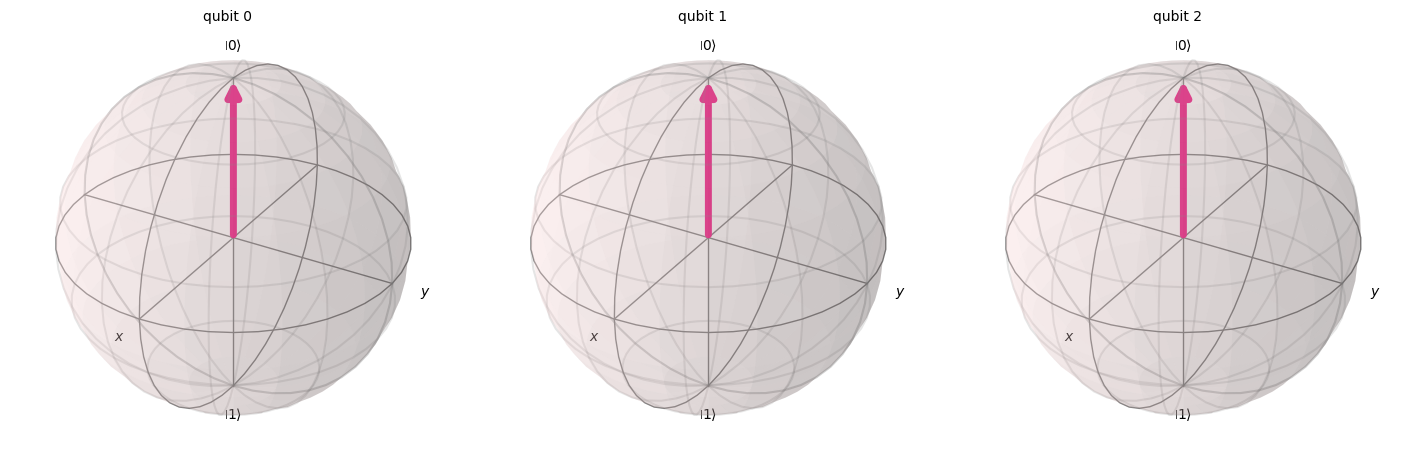

In [226]:
# Define the quantum circuit
qc = QuantumCircuit(3, 3)

# Initialize the state |000>
# qc.x(0)
# qc.x(1)
# qc.x(2)
# qc.barrier()

# Draw initial state on Bloch sphere
sim = Aer.get_backend("aer_simulator")
qc_init = qc.copy()
qc_init.save_statevector()
statevector = sim.run(qc_init).result().get_statevector()
plot_bloch_multivector(statevector)

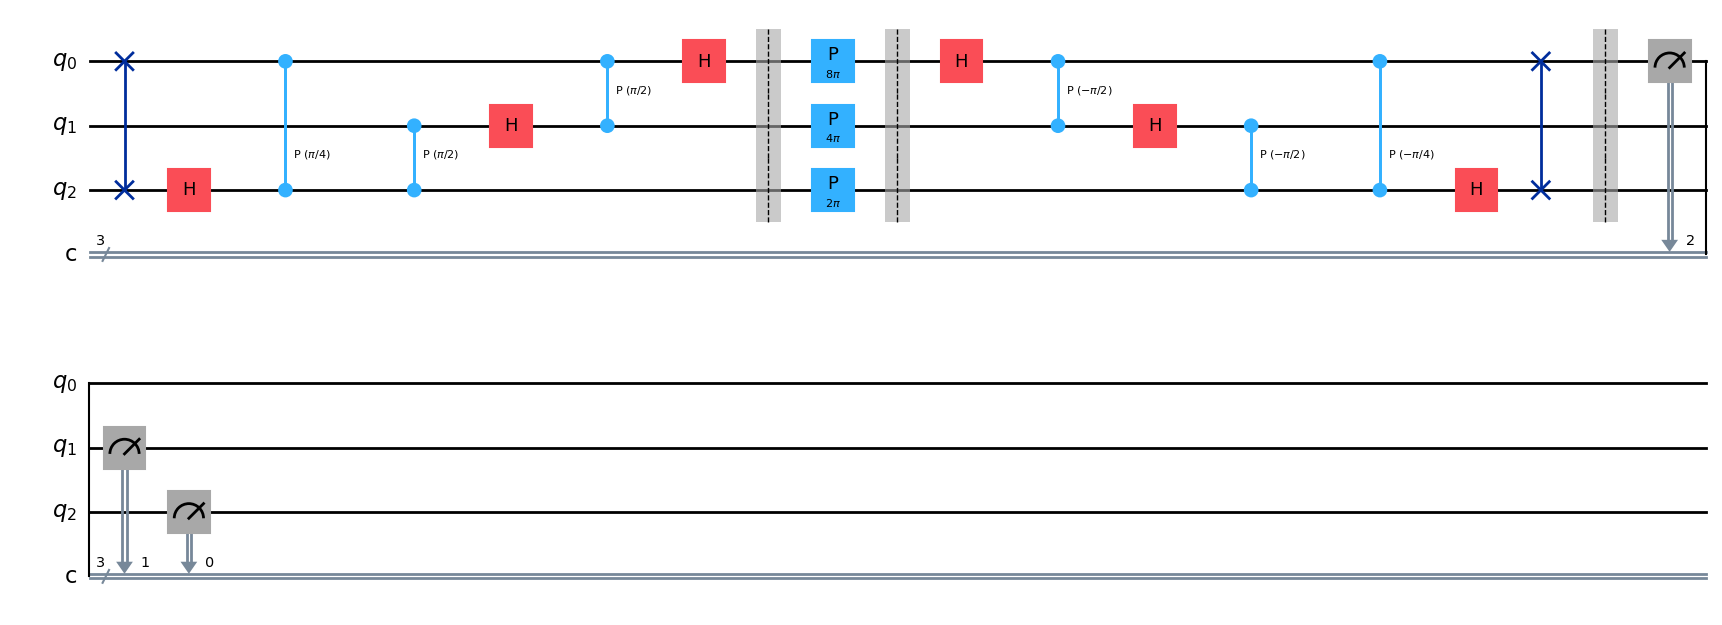

In [227]:
# QFT implementation
qc.swap(0, 2)
qc.h(2)
qc.cp(np.pi / 2**2, 0, 2)
qc.cp(np.pi / 2, 1, 2)
qc.h(1)
qc.cp(np.pi / 2, 0, 1)
qc.h(0)
qc.barrier()

# save the state after QFT
qc_qft = qc.copy()
qc_qft.save_statevector()

# Phase gates for counting
qc.p(n * np.pi, 0)
qc.p(n * np.pi / 2, 1)
qc.p(n * np.pi / 4, 2)
qc.barrier()

# Save the state after phase gates
qc_phase = qc.copy()
qc_phase.save_statevector()

# IQFT implementation
qc.h(0)
qc.cp(-np.pi / 2, 0, 1)
qc.h(1)
qc.cp(-np.pi / 2, 1, 2)
qc.cp(-np.pi / 2**2, 0, 2)
qc.h(2)
qc.swap(0, 2)
qc.barrier()

# Save the final state before measurement
qc_final = qc.copy()
qc_final.save_statevector()

# Measurement
qc.measure(range(3), range(2, -1, -1))

# draw the circuit
qc.draw('mpl')

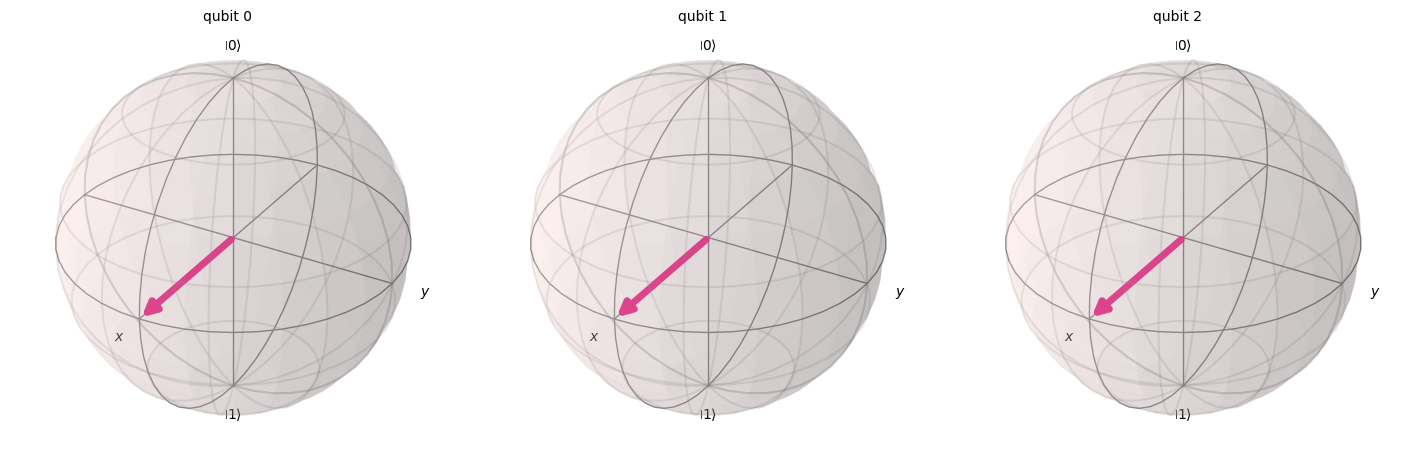

In [228]:
# draw the state before phase gates on Bloch sphere
statevector = sim.run(qc_qft).result().get_statevector()
plot_bloch_multivector(statevector)

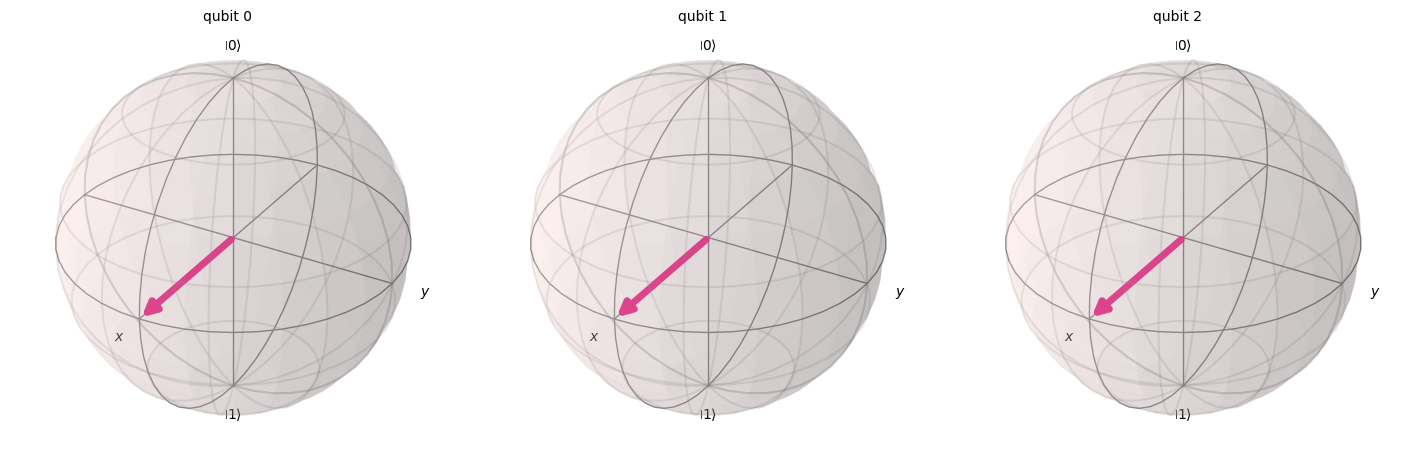

In [229]:
# draw the state after phase gates on Bloch sphere
statevector = sim.run(qc_phase).result().get_statevector()
plot_bloch_multivector(statevector)

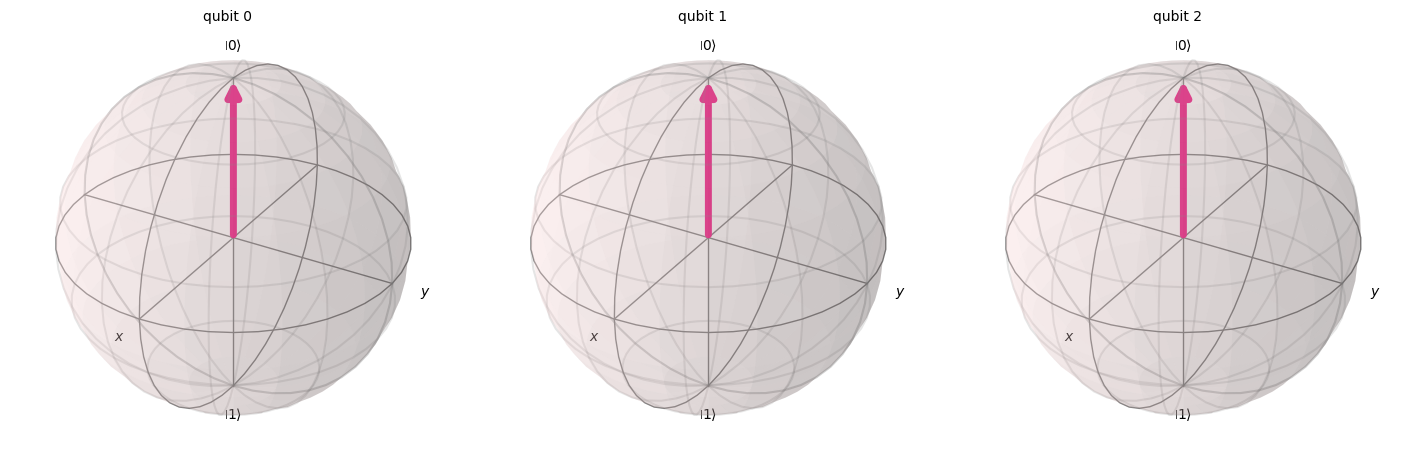

In [230]:
# draw the final state on Bloch sphere
statevector = sim.run(qc_final).result().get_statevector()
plot_bloch_multivector(statevector)

Statevector([ 1.-0.j, -0.+0.j,  0.+0.j, -0.+0.j,  0.+0.j, -0.+0.j, -0.+0.j,
              0.+0.j],
            dims=(2, 2, 2))


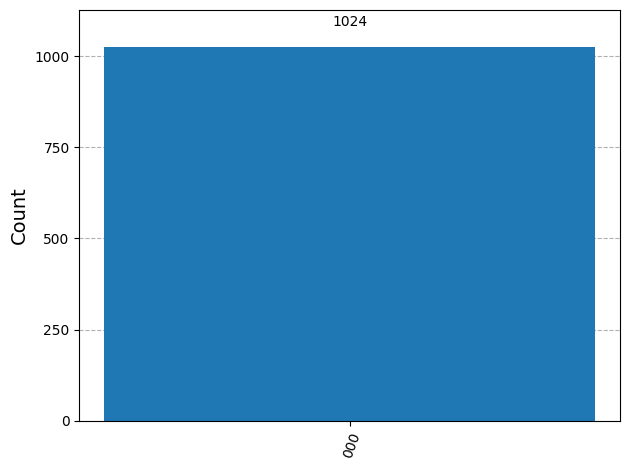

In [231]:
# Define the simulator
backend = Aer.get_backend("statevector_simulator")

# Compile the circuit on the computer or simulator
compiled_circuit = transpile(qc, backend=backend)
# Execute the circuit on the simulator
job = backend.run(compiled_circuit, shots=1024)
# Get the results of the execution
result = job.result()
# Get the counts of the results
counts = result.get_counts(qc)
# print the results as a state vector
print(result.get_statevector(compiled_circuit, decimals=3))
# Plot the results as a histogram
plot_histogram(counts)